# Proyecto 2: 
### Notebook #1: Análisis Exploratorio con tablas y gráficas de sus datos

In [9]:
import pandas as pd
import pandas as pd
import plotly.graph_objects as go
df = pd.read_csv("../data/dataset_proyecto_statistical_learning.csv")

#### Se comenzara verificando estadíticas descriptivas de todas las columnas númericas
1. Se indicara la cantidad de filas y columnas del dataset
2. Se indicara la cantidad de datos faltantes si hay
3. Se realizara un análisis descriptivo 
4. Se clasificara a las variables en continuas, categoricas o discretas
5. Cuantificación de outliers

In [10]:
# Visualización de las primeras filas del dataset, para una visualización rapida del contenido
df.head()

,date,phone,targetid,attribute,weekstartdate,gender,agerange,device,creative,placement,...,property,publisher,campaignname,state,utmsource,utmcampaign,campaigntype,unique_leads,unique_answers,age
0,2023-07-01,2.055080e+09,645cdca06beec953cd8ceef8,Health (cancer),2023-07-01,FEMALE,30 - 39,MOBILE,8984142e-3a16-4599-8f0a-41f897cf2d52,GetItFree - All Traffic - Primary,...,GetItFree,Tibrio,QVS - Mass Tort Talcum - Day,AL,1b09a870785a7b4419ac7e90508c12fc,35c07a2d9a9290106b73bed7bd207e80,Talcum,0,0,31.0
1,2023-07-01,4.142028e+09,645cdca06beec953cd8cef14,Health (cancer: Stage I),2023-07-01,FEMALE,50 - 59,MOBILE,8984142e-3a16-4599-8f0a-41f897cf2d52,Workn Well - Primary Placement,...,Workn Well,Tibrio,QVS - Mass Tort Talcum - Day,WI,d7aefe10a495029cf52085a85426b415,31e18e575a569774b0060e67f86e9fdb,Talcum,0,0,53.0
2,2023-07-01,4.013788e+09,645cdeab6beec953cd8cef94,Health (cancer: Stage Iv),2023-07-01,FEMALE,60 - 69,MOBILE,33253883-03db-421c-874f-2acb78459fb3,Workn Well - Primary Placement,...,Workn Well,Tibrio,QVS - Mass Tort Talcum - AH,MA,d7aefe10a495029cf52085a85426b415,31e18e575a569774b0060e67f86e9fdb,Talcum,0,0,61.0
3,2023-07-01,9.312543e+09,645cdeaa6beec953cd8cef84,Health (cancer: Stage Ii),2023-07-01,FEMALE,50 - 59,MOBILE,33253883-03db-421c-874f-2acb78459fb3,Workn Well - Primary Placement,...,Workn Well,Tibrio,QVS - Mass Tort Talcum - AH,TN,4fa2c5c1c8766abe797da7106c0801b8,ecc7c7a42da7ea88566499d1dc280a7f,Talcum,0,0,59.0
4,2023-07-01,9.312739e+09,645cdeab6beec953cd8cef92,Health (cancer: Stage Iii),2023-07-01,FEMALE,60 - 69,MOBILE,33253883-03db-421c-874f-2acb78459fb3,Workn Well - Primary Placement,...,Workn Well,Tibrio,QVS - Mass Tort Talcum - AH,TN,4fa2c5c1c8766abe797da7106c0801b8,ecc7c7a42da7ea88566499d1dc280a7f,Talcum,0,0,68.0


In [11]:
#Conteo de cuantas filas y columnas tiene el dataset
num_filas = df.shape[0]
num_columnas = df.shape[1]
print(f"El dataframe tiene {num_filas} filas.")
print(f"El dataframe tiene {num_columnas} columnas.")

El dataframe tiene 60805 filas.
El dataframe tiene 32 columnas.


In [12]:
# Información sobre tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60805 entries, 0 to 60804
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            60805 non-null  object 
 1   phone           60607 non-null  float64
 2   targetid        60805 non-null  object 
 3   attribute       60805 non-null  object 
 4   weekstartdate   60805 non-null  object 
 5   gender          60607 non-null  object 
 6   agerange        60683 non-null  object 
 7   device          60607 non-null  object 
 8   creative        60683 non-null  object 
 9   placement       60683 non-null  object 
 10  deviceos        60607 non-null  object 
 11  records         60805 non-null  int64  
 12  calls           60805 non-null  int64  
 13  contacts        60805 non-null  int64  
 14  humananswers    60805 non-null  int64  
 15  voicemail       60805 non-null  int64  
 16  answered        60805 non-null  int64  
 17  leads           60805 non-null 

In [13]:
#Número de valores faltantes o nan por columna dentro del dataset
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
date                  0
phone               198
targetid              0
attribute             0
weekstartdate         0
gender              198
agerange            122
device              198
creative            122
placement           122
deviceos            198
records               0
calls                 0
contacts              0
humananswers          0
voicemail             0
answered              0
leads                 0
billable              0
revenue               0
marketingcost         0
totalcost             0
property            122
publisher          3170
campaignname          0
state               198
utmsource           554
utmcampaign       23688
campaigntype          0
unique_leads          0
unique_answers        0
age                  42
dtype: int64


In [14]:
#Análisis descriptico estadistico, para cada una de las variables categoricas, del dataset
percentiles = [i/100 for i in range(0, 101, 10)]
description = df.describe(percentiles=percentiles).round(2)
description

,phone,records,calls,contacts,humananswers,voicemail,answered,leads,billable,revenue,marketingcost,totalcost,unique_leads,unique_answers,age
count,6.060700e+04,60805.0,60805.00,60805.00,60805.00,60805.00,60805.00,60805.00,60805.00,60805.00,60805.00,60805.00,60805.00,60805.00,60763.00
mean,5.831113e+09,1.0,30.95,1.63,1.26,21.84,0.54,0.04,0.01,2.68,0.44,0.53,0.03,0.54,60.64
std,2.394421e+09,0.0,25.72,2.17,1.70,24.50,0.50,0.23,0.10,26.80,0.57,0.60,0.18,0.50,15.11
min,2.012124e+09,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00
0%,2.012124e+09,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00
10%,2.528134e+09,1.0,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,38.00
20%,3.193893e+09,1.0,9.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.26,0.34,0.00,0.00,50.00
30%,4.084568e+09,1.0,13.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.36,0.41,0.00,0.00,56.00
40%,5.052528e+09,1.0,19.00,0.00,0.00,8.00,0.00,0.00,0.00,0.00,0.41,0.46,0.00,0.00,60.00
50%,6.013032e+09,1.0,26.00,1.00,1.00,13.00,1.00,0.00,0.00,0.00,0.41,0.51,0.00,1.00,63.00


In [15]:
#Clasificación de las variables en continuas, discretas y categoricas
def getColumnTypes(dataset):
    continuas = []
    categoricas = []
    discretas = []

    for col in dataset.columns:
        if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64':
            if dataset[col].nunique() > 30: 
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)

    return continuas, discretas, categoricas

continuas, discretas, categoricas = getColumnTypes(df)

print("Columnas Continuas:")
for col in continuas:
    print(col)

print("\nColumnas Discretas:")
for col in discretas:
    print(col)

print("\nColumnas Categóricas:")
for col in categoricas:
    print(col)


Columnas Continuas:
phone
calls
voicemail
marketingcost
totalcost
age

Columnas Discretas:
records
contacts
humananswers
answered
leads
billable
revenue
unique_leads
unique_answers

Columnas Categóricas:
date
targetid
attribute
weekstartdate
gender
agerange
device
creative
placement
deviceos
property
publisher
campaignname
state
utmsource
utmcampaign
campaigntype


In [26]:
#Se convirtieron las variables categoricas en númericas para cuantificar outliers y cisualizar cuantos outlier hay por cada variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def calculate_outliers(df):
    le = LabelEncoder()
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            print(f'Outliers en {col}: {df[col][(df[col] < lower_bound) | (df[col] > upper_bound)].count()}')
        else:
            try:
                df_temp = df[col].fillna('Unknown').astype(str)
                df_temp_encoded = le.fit_transform(df_temp)
                q1 = np.percentile(df_temp_encoded, 25)
                q3 = np.percentile(df_temp_encoded, 75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                outliers = len([x for x in df_temp_encoded if x < lower_bound or x > upper_bound])
                print(f'Outliers en {col}: {outliers}')
            except Exception as e:
                print(f'Error al procesar la columna {col}: {str(e)}')

calculate_outliers(df)


Error al procesar la columna date: name 'np' is not defined
Outliers en phone: 0
Error al procesar la columna targetid: name 'np' is not defined


Error al procesar la columna attribute: name 'np' is not defined
Error al procesar la columna weekstartdate: name 'np' is not defined
Error al procesar la columna gender: name 'np' is not defined
Error al procesar la columna agerange: name 'np' is not defined
Error al procesar la columna device: name 'np' is not defined
Error al procesar la columna creative: name 'np' is not defined
Error al procesar la columna placement: name 'np' is not defined
Error al procesar la columna deviceos: name 'np' is not defined
Outliers en records: 0
Outliers en calls: 1651
Outliers en contacts: 3599
Outliers en humananswers: 1670
Outliers en voicemail: 2535
Outliers en answered: 0
Outliers en leads: 2018
Outliers en billable: 630
Outliers en revenue: 630
Outliers en marketingcost: 10249
Outliers en totalcost: 3273
Error al procesar la columna property: name 'np' is not defined
Error al procesar la columna publisher: name 'np' is not defined
Error al procesar la columna campaignname: name 'np' is not def

In [ ]:
# Identificación de que categoría dentro de cada una de las variables categoricas, su sumatoria es atipica, es decir que no tienen nada de presencia dentro del dataset o tienen excesiva presencia
for column in df.select_dtypes(include=['object']).columns:
    category_counts = df[column].value_counts()

    Q1 = category_counts.quantile(0.10)
    Q3 = category_counts.quantile(0.90)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nCategorías atípicas en {column}:")
    for category, count in category_counts.items():
        if count < lower_bound or count > upper_bound:
            print(f"{category}: {count} (es un valor atípico de acuerdo a la regla del IQR)")



Categorías atípicas en date:

Categorías atípicas en targetid:
645cdca06beec953cd8cef1c: 2412 (es un valor atípico de acuerdo a la regla del IQR)
645cdeaa6beec953cd8cef8a: 1695 (es un valor atípico de acuerdo a la regla del IQR)
645cdca06beec953cd8cef1e: 1458 (es un valor atípico de acuerdo a la regla del IQR)
63e2c0d6b783ec15a1f1d307: 1350 (es un valor atípico de acuerdo a la regla del IQR)
645cdca06beec953cd8cef12: 1349 (es un valor atípico de acuerdo a la regla del IQR)
645e5b7c08d9b12c28db58eb: 1270 (es un valor atípico de acuerdo a la regla del IQR)
645cdeab6beec953cd8cef8c: 1221 (es un valor atípico de acuerdo a la regla del IQR)
64010c322c7988556cc45ef7: 1218 (es un valor atípico de acuerdo a la regla del IQR)
64010716c6c06d234d57bab6: 1172 (es un valor atípico de acuerdo a la regla del IQR)
63e2c0d5b783ec15a1f1d2fb: 1149 (es un valor atípico de acuerdo a la regla del IQR)
645e5a53d7931f76ea74d82d: 1116 (es un valor atípico de acuerdo a la regla del IQR)
645cdca06beec953cd8cef1

### Presentación de graficos de correlación e histogramas
1. Se presenta un heatmap con las correlaciones entre variables
2. Se presentan los histogramas y diagramas de caja y bigotes de cada una de las variables.

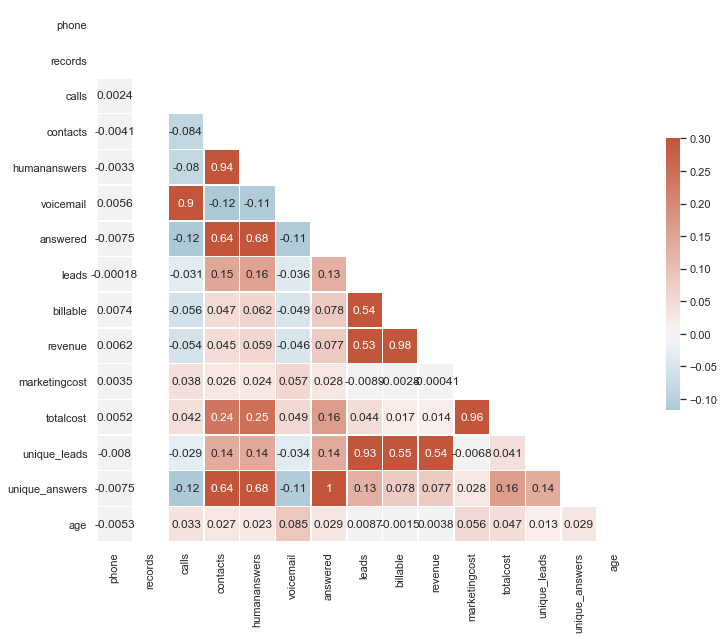

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [30]:
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()

df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column].fillna('Unknown', inplace=True)
    df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))

for column in df_encoded.select_dtypes(include=[np.number]).columns:
    fig = px.histogram(df_encoded, x=column, nbins=50, title=f'Histograma de {column}')
    fig.update_layout(bargap=0.1, width=500, height=300, plot_bgcolor='white', paper_bgcolor='white') # Fondo blanco y tamaño más pequeño

for column in df_encoded.select_dtypes(include=[np.number]).columns:
    fig = px.box(df_encoded, y=column, title=f'Diagrama de caja de {column}')
    fig.update_layout(width=500, height=300, plot_bgcolor='white', paper_bgcolor='white') # Fondo blanco y tamaño más pequeño




In [29]:
# Gráficos de barras para cada variable categórica
for column in df.select_dtypes(include=['object']).columns:
    fig = px.histogram(df, x=column, title=f'Gráfico de barras de {column}')
    fig.update_layout(bargap=0.1)
print("")

In [ ]:
# Heatmap con correlaciones
corr = df_encoded.corr()
fig = px.imshow(corr, color_continuous_scale='RdBu_r', title='Matriz de correlación')
fig.update_layout(width=1200, height=800, plot_bgcolor='white', paper_bgcolor='white') # Fondo blanco y tamaño más grande para el heatmap
fig.show()